In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from ultralytics import YOLO

In [2]:
# Load model
model_path = "./models/seg-model.onnx"
model = YOLO(model_path, task="segment")

In [3]:
# test image
test = ["./test/test1.png","./test/test2.png", "./test/leather3.jpg"]

result1 = model.predict(test[0], save=True, imgsz=1440, conf=0.5, device="0")
result2 = model.predict(test[1], save=True, imgsz=1440, conf=0.5, device="0")
result3 = model.predict(test[2], save=True, imgsz=1440, conf=0.5, device="0")

Loading models\seg-model.onnx for ONNX Runtime inference...



image 1/1 c:\Users\chant\Desktop\CV_Project\ComputerVision_STA_Project\test\test1.png: 1440x1440 43 {0: 'Jasmine'}s, 428.0ms
Speed: 86.0ms preprocess, 428.0ms inference, 222.0ms postprocess per image at shape (1, 3, 1440, 1440)
Results saved to runs\segment\predict13

image 1/1 c:\Users\chant\Desktop\CV_Project\ComputerVision_STA_Project\test\test2.png: 1440x1440 43 {0: 'Jasmine'}s, 429.0ms
Speed: 11.0ms preprocess, 429.0ms inference, 146.8ms postprocess per image at shape (1, 3, 1440, 1440)
Results saved to runs\segment\predict13

image 1/1 c:\Users\chant\Desktop\CV_Project\ComputerVision_STA_Project\test\leather3.jpg: 1440x1440 6 {0: 'Jasmine'}s, 38 {1: 'Non-Jasmine'}s, 439.0ms
Speed: 11.0ms preprocess, 439.0ms inference, 68.0ms postprocess per image at shape (1, 3, 1440, 1440)
Results saved to runs\segment\predict13


In [4]:
colors = {
    0: (0, 255, 0), # Green for Jasmine rice
    1: (255, 0, 0) # Red for Non-Jasmine rice
}

def draw_result(result):
    # define figure size
    result = result[0]
    base_image = result.orig_img
    base_image = cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB)

    labels = result.boxes.cls.cpu().numpy()
    xy = result.masks.xy
    
    # draw masks of the detected objects (iterate over xy)
    blank_image = np.zeros_like(base_image)
    for mask, label in zip(xy, labels):
        mask = mask.reshape((-1, 1, 2))
        mask = mask.astype(np.int32)
        cv2.fillPoly(blank_image, [mask], colors[int(label)])
    
    alpha = 0.4
    cv2.addWeighted(blank_image, alpha, base_image, 1 - alpha, 0, base_image)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(base_image)
    plt.axis('off')
    plt.title(os.path.basename(result.path))
    plt.show()

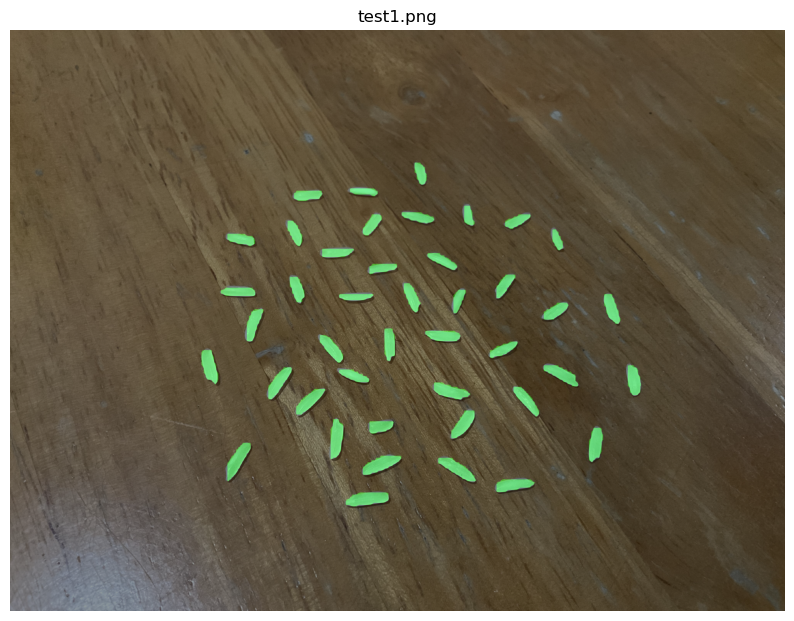

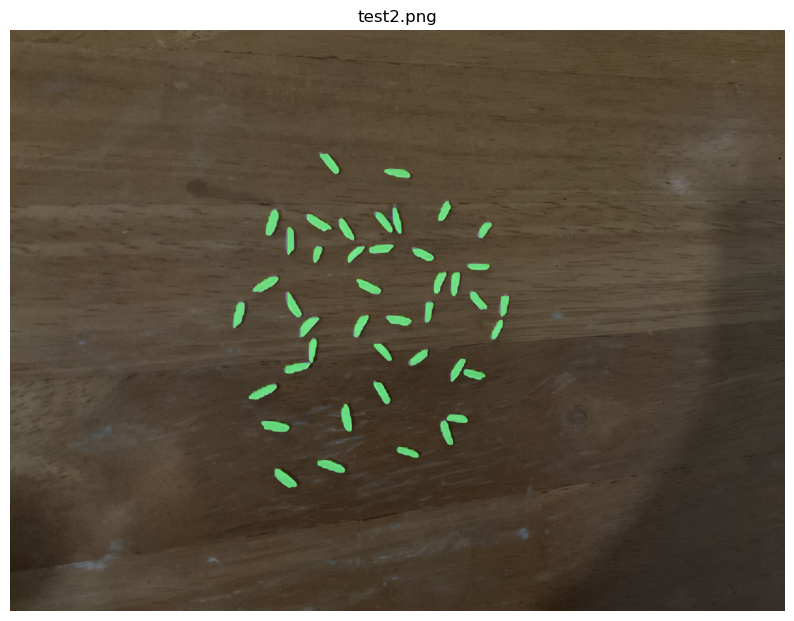

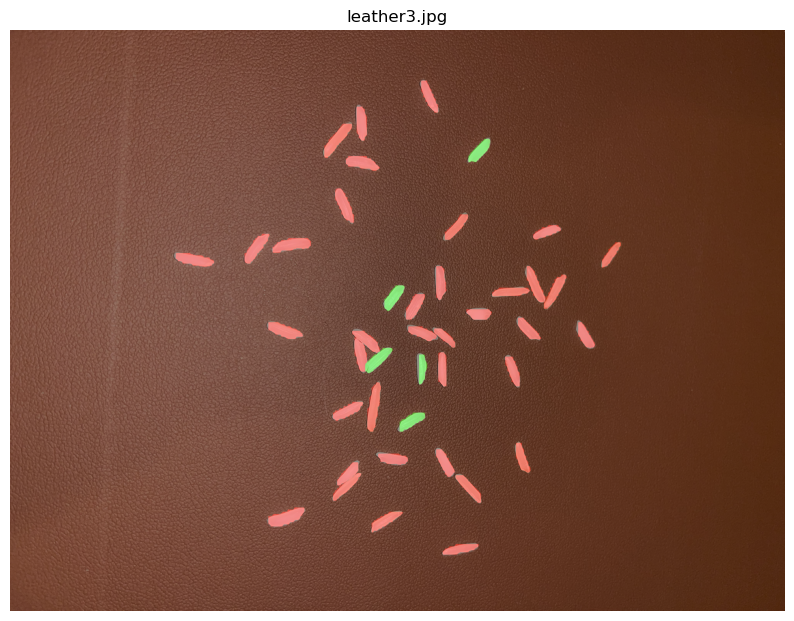

In [5]:
draw_result(result1)
draw_result(result2)
draw_result(result3)